# Lista de Exercício 1
### Introdução ao Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 4 exercícios. Mas leia com atenção toda a parte introdutória, pois fará diferença para esta e demais listas!
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado - **ou identifique-se cópia** - o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_1.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: `

`Número USP: `

Vamos utilizar a biblioteca [Numpy](https://numpy.org/doc/stable/) para a grande maioria dos cálculos nesta disciplina. É uma biblioteca totalmente aberta, gratuita e amplamente utilizada para diversas áreas. Este [link](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) contém dicas para usuários de MATLAB se adaptarem ao numpy. Utilize-o caso seja conveniente.

Vamos importá-la (biblioteca Numpy) com um apelido ```np```, o qual utilizaremos ao longo de toda a prática:

In [2]:
import numpy as np

##Lidando com matrizes - Numpy

Vamos utilizar a função np.array para criar matrizes de n-dimensões 
(N-dimensional array ([ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html#arrays-ndarray))):


In [3]:
# Array de uma dimensão (1D)
A = np.array((1, 2))

print("A matriz A pertence ao tipo: {}".format(type(A)))
print(A)
print("\n")


# Array (2D)
A = np.array([[-111, 345], 
              [35, 40],
              [514, 6]])

print(A)
print("\n")

# As arrays podem ser criadas utilizando 
# tanto parênteses quanto colchetes
B = np.array(((-111., 345.5), 
              (35, 40.1),
              (514, 6.1254)))

print(B)
print("\n")

A matriz A pertence ao tipo: <class 'numpy.ndarray'>
[1 2]


[[-111  345]
 [  35   40]
 [ 514    6]]


[[-111.      345.5   ]
 [  35.       40.1   ]
 [ 514.        6.1254]]




Note que, na célula anterior, as matrizes *A* e *B* são diferentes quanto à classe de dados. A matriz *A* contém números inteiros, já a matriz *B* contém números com casa decimais. As diferentes classes de dados utilizadas na biblioteca numpy podem ser encontradas [aqui](https://numpy.org/doc/stable/user/basics.types.html).

Você pode mostrar a classe de dados de uma variável da seguinte forma:
```python
print("Dados da matriz A com tipo: %s" % A.dtype)
```
Da mesma forma, você pode converter a matriz para outro tipo de classe da seguinte forma:
```python
D = A.astype("uint16")
```

### EXERCÍCIO 1 (peso 2/10).
1. Mostre quais as classes das matrizes A e B fornecidas acima.
2. Converta a matriz A para o tipo uint16. Mostre a matriz convertida. **Explique o resultado obtido.**
3. Converta a matriz B para o tipo int8. Mostre a matriz convertida. **Explique o resultado obtido.**


In [4]:
# Mostrando as classes de dados das matrizes
print("A matriz A é  do tipo: %s" % A.dtype)
print("A matriz B é  do tipo: %s" % B.dtype)
print()

# Convertendo a matriz A
A_int = A.astype("uint16")
print("A nova matriz A é  do tipo: %s" % A_int.dtype)
print(A_int)
print()

# Convertendo a matriz B
B_int = B.astype("uint8")
print("A nova matriz B é  do tipo: %s" % B_int.dtype)
print(B_int)

A matriz A é  do tipo: int64
A matriz B é  do tipo: float64

A nova matriz A é  do tipo: uint16
[[65425   345]
 [   35    40]
 [  514     6]]

A nova matriz B é  do tipo: uint8
[[145  89]
 [ 35  40]
 [  2   6]]


As novas matrizes A e B, por serem do tipo unsigned int, não tem suporte para números negativos. Dessa forma, os números que originalmente eram negativos foram interpretados como $$2^n - k$$ onde n é o número de bits (16 para a matriz A e 8 para a matriz B) e k é o módulo do número original.

Além disso, todas as partes decimais dos números da matriz B foram truncados.

**ATENÇÃO!** Aprenda a lidar com os tipos de variáveis e a ficar atento aos dados incorretos que possam ser gerados, principalmente ao usar imagens (em que o range é de 0-255 (uint8)). Além disso, ao realizar operações, a classe de dados pode não se alterar automaticamente, como acontece com o seguinte caso ao somar variáveis. Veja:

In [5]:
# Apenas para chamar a atenção: execute esta célula para verificar a diferença de resultados.
Auint8 = np.ones(shape=(3,3)).astype("uint8")
Auint8 +=300
print(Auint8)
print(Auint8.dtype)

print("-----")
Auint81 = np.ones(shape=(3,3)).astype("uint8")
Auint81=Auint81+300
print(Auint81)
print(Auint81.dtype)

[[45 45 45]
 [45 45 45]
 [45 45 45]]
uint8
-----
[[301 301 301]
 [301 301 301]
 [301 301 301]]
uint16


### Indexando matrizes

Agora vamos estudar como extrair dados de uma matriz ou substituir os lá existentes. O acesso às *arrays* se dá por meio de indexação (*indexing*), também denominada *slicing*. 

Mais informações sobre os vários tipos de indexação você pode encontrar neste [link](https://numpy.org/doc/stable/reference/arrays.indexing.html). [Aqui](https://numpy.org/doc/stable/reference/arrays.indexing.html#advanced-indexing) estão alguns tipos avançados de indexação.

Vamos ver alguns tipos básicos de indexação:

In [6]:
A = np.array([[1 , 2 , 3 , 4 , 5 ], 
              [6 , 7 , 8 , 9 , 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20]], dtype=np.int16)

# Mostrando a matriz A
print(A)
print("\n")

# Para selecionar um determinado elemento da matriz, deve-se utilizar:
# A[i,j], sendo i o número da linha e j o número da coluna com i,j = 0, ...n-1
# Ex.: Elemento da linha 2 e coluna 3:
print(A[1,2])
print("\n")

# Usa-se dois pontos (:) para significar “todos” ou “até”.
# Ex.: Todos os elementos da quarta coluna:
print(A[:,3])
print("\n")

# Ex.: Todos os elementos da primeira linha:
print(A[0,:])
print("\n")

# Ex.: Todos os elementos da linha 1 até a linha 3 e da coluna 3 até a coluna 4:
print(A[0:3,2:4])
print("\n")

# Ex.: Fazer todos os elementos da coluna 2 iguais a zero:
B = A.copy()
B[:,1] = 0
print(B[:,1])
print("\n")

# Ex.: O elemento da última linha e última coluna:
print(A[-1,-1])
print("\n")

# Ex.: Todos os elementos da última coluna:
print(A[:,-1])
print("\n")

# Ex.: O elemento da última linha e primeira coluna antes da última:
print(A[-1,-2])
print("\n")

# Ex.: Os elementos da linha 2 até a última linha e da última coluna até a segunda coluna com passo de –2:
print(A[1:,-1:1:-2])
print("\n")

# Ex.: Matriz transposta de A
print(A.transpose())

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


8


[ 4  9 14 19]


[1 2 3 4 5]


[[ 3  4]
 [ 8  9]
 [13 14]]


[0 0 0 0]


20


[ 5 10 15 20]


19


[[10  8]
 [15 13]
 [20 18]]


[[ 1  6 11 16]
 [ 2  7 12 17]
 [ 3  8 13 18]
 [ 4  9 14 19]
 [ 5 10 15 20]]


### Propriedades das matrizes

Nesta célula, vamos estudar como extrair algumas propriedades da matriz, bem como executar algumas operações básicas na mesma. 

Algumas operações são feitas ao longo dos eixos da matriz. Veja abaixo a definição de eixos extraída da documentação.

In [7]:
''' 

Definição de axis: "Os eixos são definidos para matrizes com mais de uma 
dimensão. Uma matriz bidimensional tem dois eixos: o primeiro, executando 
verticalmente, para baixo, nas linhas (eixo 0), e o segundo, executando 
horizontalmente, nas colunas (eixo 1)."

Ref: https://numpy.org/doc/stable/glossary.html?highlight=axis#glossary

''' 

### ----- Propriedades da matriz -----
# Número de linhas e colunas de uma matriz (2D neste exemplo)
M, N = A.shape
print("Nossa matriz A tem o formato de:{}, com {} linhas e {} colunas.".format(A.shape,M,N))

# Número total de elementos da matriz
MxN = A.size
print("Nossa matriz possui um total de %d elementos." % (MxN))

### ----- Operações -----
# Ex.: Vetor mostrando os valores máximos de cada coluna de uma matriz:
print(np.max(A, axis=0))

# Ex.: Valor máximo de uma matriz:
print(np.max(A))    # Alternativa: A.max()

# Ex.: Vetor mostrando os valores mínimos de cada coluna de uma matriz:
print(np.min(A, axis=0))

# Ex.: Valor mínimo de uma matriz:
print(np.min(A))    # Alternativa: A.min()

# Ex.: Soma dos elementos ao longo das linhas
print(np.sum(A, axis=1))

# Ex.: Soma de todos os elementos da matriz
print(np.sum(A))    # Alternativa: A.sum()

# Ex.: Média dos elementos ao longo das colunas
print(np.mean(A, axis=0)) 

# Ex.: Média de toda a matriz
print(np.mean(A))   # Alternativa: A.mean()

# Ex.: Variância dos elementos ao longo das colunas
print(np.var(A, ddof=1, axis=0)) 

# Ex.: Variância de toda a matriz
print(np.var(A, ddof=1))   # Alternativa: A.var(ddof=1)

Nossa matriz A tem o formato de:(4, 5), com 4 linhas e 5 colunas.
Nossa matriz possui um total de 20 elementos.
[16 17 18 19 20]
20
[1 2 3 4 5]
1
[15 40 65 90]
210
[ 8.5  9.5 10.5 11.5 12.5]
10.5
[41.66666667 41.66666667 41.66666667 41.66666667 41.66666667]
35.0


A biblioteca Numpy também permite gerar arranjos padrões que são úteis em diversas aplicações:

*   [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) - matriz de zeros;
*   [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) - matriz de uns;
*   [np.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) - matriz de números aleatórios uniformemente distribuídos no intervalo ```[0,1]```;
*   [np.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) - matriz de números aleatórios com uma distribuição normal (distribuição gaussiana) com média 0 e variância 1. (**Lembrando**: há uma probabilidade de aproximadamente 68% dos dados estarem dentro de uma faixa de -1*desvio padrão até 1*desvio padrão, sendo ``` (desvio padrão )^2  = variância ```.)

### EXERCÍCIO 2 (peso 2/10)

1. Gere uma matriz aleatória 1000x1000 com distribuição normal de média igual a 10 e variância igual a 9. Plote o histograma e **comente os resultados**. Quais os valores e probabilidades envolvidos? (Visite a página da função para entender melhor como ela funciona!)

``` python
#Dica - Você pode usar a biblioteca matplotlib para isto substituindo:
plt.figure()
plt.imshow(matriz, 'gray')
plt.show()
#por:
plt.figure()
plt.hist(matriz.flatten(),bins=1000) #sempre converter a matriz para 1D, por isto o flatten()
plt.show()
```

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


[[0.08619456 0.17398002 0.76621026]
 [0.41950833 0.56987987 0.00982853]
 [0.06945131 0.7835275  0.33696338]]


[[-1.61497933e-01 -4.78503516e-01  1.40991014e+00]
 [-8.11799059e-01 -1.12937390e+00 -1.47109470e-01]
 [ 2.37965310e-04 -1.08333705e+00  4.81794604e-01]]




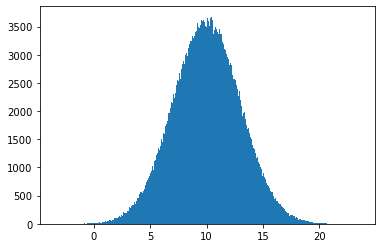

In [8]:
import matplotlib.pyplot as plt

Azeros = np.zeros(shape=(5,5))
print(Azeros)
print("\n")

Aones = np.ones(shape=(5,5))
print(Aones)
print("\n")

Arand = np.random.rand(3,3)
print(Arand)
print("\n")

Arandn = np.random.randn(3,3)
print(Arandn)
print("\n")

desvio = 3
media = 10
matriz_randn = desvio * np.random.randn(1000,1000) + media

plt.figure()
plt.hist(matriz_randn.flatten(),bins=1000)
plt.show()

#Comentários:

Percebe-se que a maior parte dos números está concentrado em torno da média 10 e, quando se afastam da média, a frequência diminui cada vez mais.

Caso queira obter a descrição de uma função específica, você pode utilizar o comando `help()`.

Por exemplo:
`help(np.max)`

## Imagens

As imagens nada mais são do que matrizes. Cada pixel está relacionado com uma posição A[i,j] da matriz, tal que ```0  ≤ i  ≤ M-1``` e ```0  ≤ j  ≤ N-1```. Em cada tipo de imagem, o valor do pixel tem uma representação específica, como por exemplo:

1. **Imagens de Intensidades:** É uma matriz de dados cujos valores representam as intensidades em cada ponto. Se os elementos de intensidade forem da classe ```uint8```, seus valores estarão no intervalo ```[0, 255]```. Se forem da classe ```uint16```, seus valores variarão no intervalo ```[0, 65535]```.

2. **Imagens RGB:** É composta por 3 matrizes de dados, em que cada matriz é responsável por armazenar as informações de intensidades de cada canal: R (red - vermelho), G (green - verde) ou B (blue - azul).

2. **Imagens Binárias:** É um arranjo lógico de zeros e uns, sendo, esses dados (zeros e uns), da classe ```logical```.

Vamos aprender a ler imagens de arquivos, mostrá-las e processá-las. Para a leitura e exibição dessas imagens, utilizaremos as bibliotecas [OpenCV](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) e  [Matplotlib](https://matplotlib.org).

Vamos importar as bibliotecas para nosso ambiente e dar "apelidos" para elas.

In [9]:
import matplotlib.pyplot as plt
import cv2 as cv

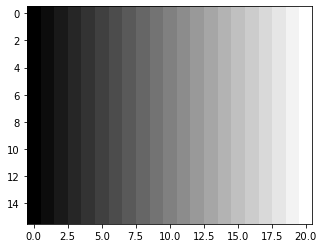

In [10]:
# Vamos criar uma matriz com vários elementos
E = np.array([[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]], dtype=np.uint8)

# Agora vamos mostrar essa imagem.
plt.figure()
plt.imshow(E, cmap='gray')
plt.show()

# Já que nossos dados são do tipo uint8, ou seja, seus valores vão de 0 a 255,
# por que a imagem foi mostrada de forma tal que o menor valor da matriz (zero) 
# fora representado em preto (o que já é de se esperar) e o maior valor matriz 
# (cem) fora representado em branco? 

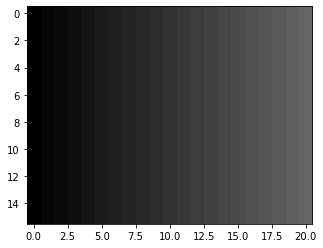

In [11]:
# Isso acontece pois a função já normaliza os valores de entrada para que o 
# colormap cubra somente a faixa de valores da própria imagem. Segue a definição
# tirada do manual:

''' 
"Por padrão, o mapa de cores cobre somente o intervalo de valores dos dados
fornecidos."
'''

# Para definirmos o intervalo de dados que o mapa de cores irá cobrir,
# devemos ajustar os parâmetros de vmin e vmax:

plt.figure()
plt.imshow(E, cmap='gray', vmin=0, vmax=255)
plt.show()

# Os parâmetros de vmin e vmax especificam os limites dos valores de branco
# e preto. O parâmetro vmin (e qualquer valor menor do que ele) corresponde
# ao preto; o parâmetro vmax (e qualquer valor maior do que ele) é mostrado
# como branco. Valores intermediários são mostrados em escala de cinza, usando
# o número padrão de níveis.

# Agora ficou como imaginamos inicialmente.

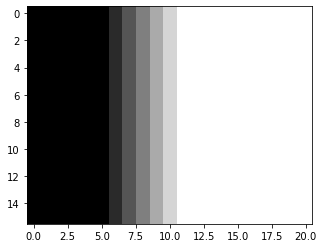

In [12]:
# Podemos ajustar para qualquer valor:
plt.figure()
plt.imshow(E, cmap='gray', vmin=25, vmax=55)
plt.show()

# Note que é importante saber qual a faixa de valores em que se está trabalhando, pois ao delimitar valores mínimo e máximo, você pode desconsiderar valores importantes no resultado.
# Não plote cegamente seus dados! Ok?

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática. 

In [13]:
import urllib.request

try:
  urllib.request.urlretrieve("https://raw.githubusercontent.com/LAVI-USP/SEL0449-SEL5895_2023/main/imagens/pratica_01/picture.jpg", "picture.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_01/livingroom.tif?raw=true", "livingroom.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_01/lena_gray_512.tif?raw=true", "lena_gray_512.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_01/lena_gray_256.tif?raw=true", "lena_gray_256.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")  


### Leitura de imagens - SUPER IMPORTANTE!!!!!!!!!!!!!!!

NESTA PRÁTICA E NAS SEGUINTES, sempre que fizer uma leitura de imagem utilize o **argumento -1 - ou cv.IMREAD_UNCHANGED - e sempre verifique o shape da imagem lida - 2 dimensões para grayscale e 3 dimensões para RGB.** Caso oculte essa flag, mesmo que a imagem mostrada apareça como grayscale, a biblioteca, por default, pode ter considerado replicar o valor para 3 canais - o que pode prejudicar o tratamento e análise a serem realizados. Para mais informações: [opencv - imread - ver flags de leitura](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56).

As imagens para esta prática encontram-se no diretório do *Github*. As mesmas são baixadas através das linhas de código anteriores e já se encontram no diretório local (caso o *download* tenha dado certo).

**IMPORTANTE (também =))**: o colormap da biblioteca *matplotlib* padrão (ou seja, se você não especificar) é 'viridis' - aparenta ser colorida -, mas na verdade é uma escala que varia de roxo até verde conforme a intensidade dos níveis de cinza aumenta. Se quiser mostrar em níveis de cinza real, você deve especificar no plot: cmap='gray'. Veja: [colormaps - matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

Agora aprenderemos a ler essas imagens que foram baixadas. 

(400, 400, 3)


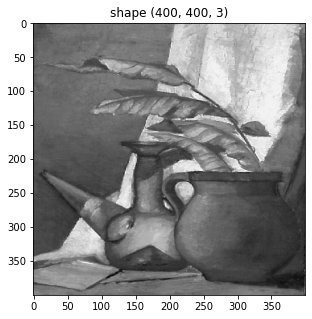

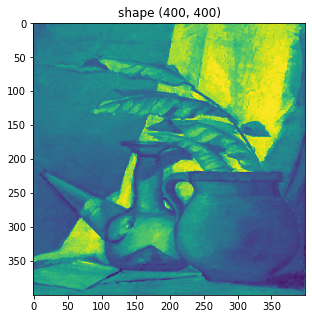

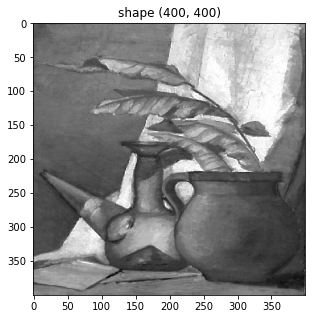

In [14]:
# Vamos carregar a imagem  - ainda sem utilizar a flag cv.IMREAD_UNCHANGED ou -1
img1 = cv.imread("picture.jpg")
img1_shape = img1.shape
print(img1_shape)

plt.figure(figsize=(5,5))
plt.title("shape {}".format(img1_shape))
plt.imshow(img1) # Aparenta ser grayscale, mas apresenta 3 canais.
plt.show()

# Agora, vamos carregar a imagem  - utilizando a flag cv.IMREAD_UNCHANGED ou -1
img1 = cv.imread("picture.jpg",cv.IMREAD_UNCHANGED)
img1_shape = img1.shape

plt.figure(figsize=(5,5))
plt.title("shape {}".format(img1_shape))
plt.imshow(img1) # 1 canal - cmap = 'viridis' - default
plt.show()

# Agora vamos mostrar a imagem em uma escala de cinzas.
plt.figure(figsize=(5,5))
plt.title("shape {}".format(img1_shape))
plt.imshow(img1,cmap='gray') # 1 canal - cmap = 'gray'
plt.show()

### EXERCÍCIO 3 (peso 4/10). Indexando imagens

Como imagens são matrizes, os esquemas de indexação de matrizes podem ser usados diretamente nas imagens.


1.   Carregue a imagem ```'livingroom.tif'``` em uma variável chamada img3. Mostre seu tipo e shape.
2.   Plote a imagem original.
3.   Usando a indexação aprendida acima, faça as seguintes alterações na imagem e plote em seguida - coloque o respectivo shape no título da imagem:
  *   Exclua as linhas pares e inverta a imagem horizontalmente.
  *   Inverta a imagem verticalmente e horizontalmente ao mesmo tempo.
  *   Considere apenas das linhas de índice 100 a 200 e colunas de índice 120 a 220.
  *   Reduza a imagem a 1/4 do seu tamanho - usando step de 4.
``` python
#ATENÇÃO - use um mesmo tamanho na tela para todas as imagens, independente da resolução:
plt.figure(figsize=(5,5) #5x5 polegadas
plt.imshow(img, 'gray')
plt.show()
```
  


A matriz tem dados do tipo uint8
A matriz tem shape (512, 512)


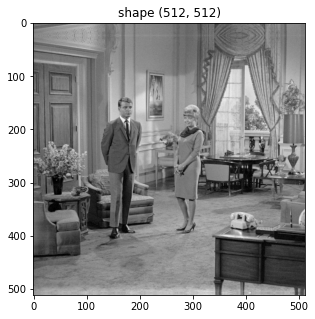

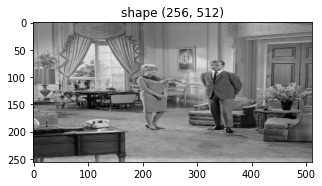

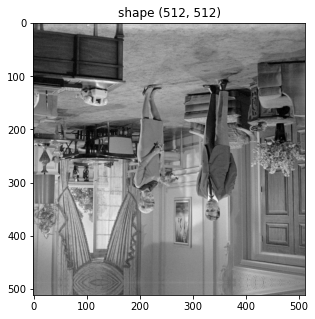

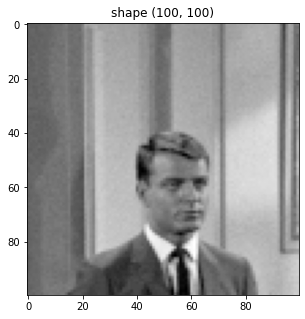

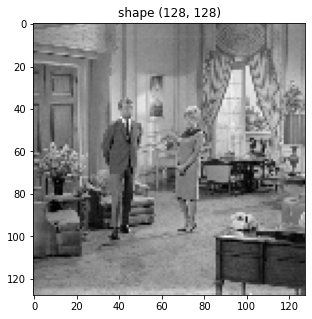

In [15]:
img3 = cv.imread('livingroom.tif', cv.IMREAD_UNCHANGED)
print('A matriz tem dados do tipo {}'.format(img3.dtype))
print('A matriz tem shape {}'.format(img3.shape))

# Mostrando a figura original
plt.figure(figsize=(5,5))
plt.title('shape {}'.format(img3.shape))
plt.imshow(img3, 'gray')
plt.show()

# Excluindo as linhas pares e invertendo a imagem horizontalmente
img3_fix1 = img3[1::2]
img3_fix1 = np.flip(img3_fix1, 1)

plt.figure(figsize=(5,5))
plt.title('shape {}'.format(img3_fix1.shape))
plt.imshow(img3_fix1, 'gray')
plt.show()

# Invertendo a imagem verticalmente e horizontalmente ao mesmo tempo.
img3_fix2 = np.flip(img3)

plt.figure(figsize=(5,5))
plt.title('shape {}'.format(img3_fix2.shape))
plt.imshow(img3_fix2, 'gray')
plt.show()

# Considerando apenas das linhas de índice 100 a 200 e colunas de índice 120 a 220
img3_fix3 = img3[100:200,120:220]

plt.figure(figsize=(5,5))
plt.title('shape {}'.format(img3_fix3.shape))
plt.imshow(img3_fix3, 'gray')
plt.show()

# Reduza a imagem a 1/4 do seu tamanho - usando step de 4.
img3_fix4 = img3[::4,::4]

plt.figure(figsize=(5,5))
plt.title('shape {}'.format(img3_fix4.shape))
plt.imshow(img3_fix4, 'gray')
plt.show()

### EXERCÍCIO 4 - Visualização de imagens (peso 2/10)

A seguir vamos ver um modo de visualizar as imagens. Você pode se valer disto para deixar seus resultados mais organizados e fáceis de entender. Além disso, não confunda o figsize com a resolução da imagem. A propriedade figsize te permite apenas diminuir ou aumentar a imagem mostrada na tela, mas a resolução da imagem não é alterada.

1. Carregue as imagens ```lena_gray_512.tif``` e ```lena_gray_256.tif```.
2. Plote as imagens em subplots (1 linha, 2 colunas). Coloque o shape, valor máximo e mínimo de cada imagem como título. Use figsize=(20,10). **Comente os resultados**.

  
``` python
#DICA - exemplo 1 linha, 2 colunas
plt.figure(figsize=(20,10))
plt.suptitle("Visualizando imagens em subplots")
plt.subplot(1,2,1)
plt.title("img1 {}: máx={} / mín={}".format(img1.shape, img1.max(),img1.min()))
plt.imshow(img1,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("img2 {}: máx={} / mín={}".format(img2.shape, img2.max(),img2.min()))
plt.imshow(img2,'gray', vmin=0, vmax=255)
plt.show()
```

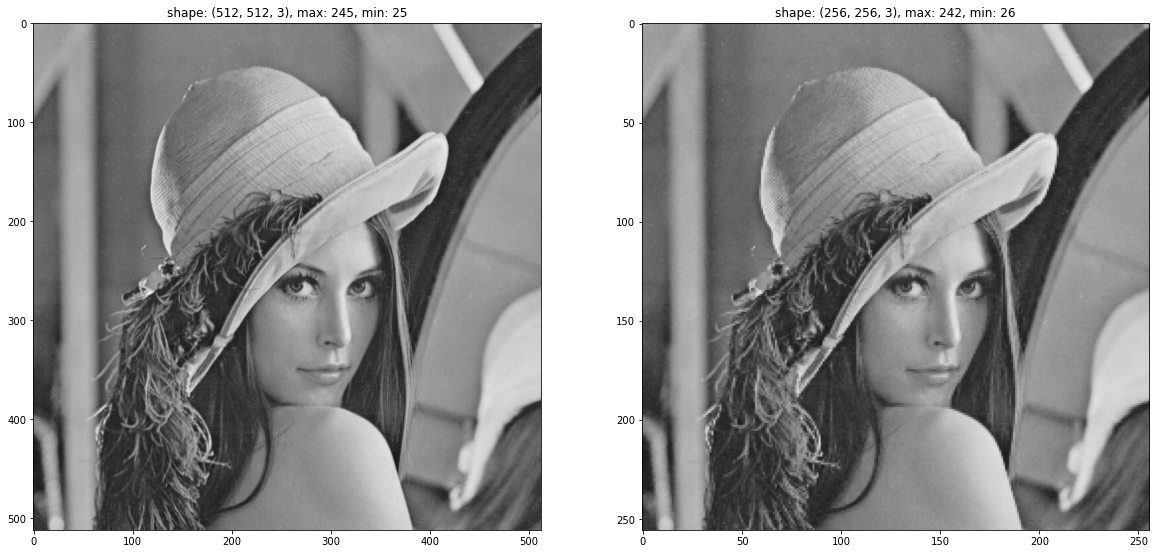

In [16]:
img4 = cv.imread('lena_gray_512.tif')
img5 = cv.imread('lena_gray_256.tif')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("shape: {}, max: {}, min: {}".format(img4.shape, img4.max(),img4.min()))
plt.imshow(img4,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("shape: {}, max: {}, min: {}".format(img5.shape, img5.max(),img5.min()))
plt.imshow(img5,'gray', vmin=0, vmax=255)
plt.show()

A primeira imagem, por possuir mais pixels, representa melhor a realidade e apresenta maior nitidez.